In [70]:
import pandas as pd
import time
import datetime
import lightgbm as lgb

# EDA

### - shape

In [98]:
train = pd.read_csv("training_set_VU_DM.csv")

In [99]:
train.head(2)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [100]:
len(train)

4958347

In [101]:
len(train.columns)

54

In [102]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [103]:
test = pd.read_csv("test_set_VU_DM.csv")

In [104]:
test.head(2)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
len(test)

4959183

In [106]:
test.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [107]:
# position, click_bool, booking_bool in train but not test

### - types

In [6]:
train.dtypes #only date_time has a type other than int64 or float64

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [13]:
test.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance      float64
random_bool              

In [25]:
multi_categorical_features= ["srch_id", "site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "srch_destination_id", 
                             "comp1_rate", "comp1_inv", "comp2_rate", "comp2_inv", "comp3_rate", "comp3_inv", "comp4_rate", "comp4_inv",
                            "comp5_rate", "comp5_inv", "comp6_rate", "comp6_inv", "comp7_rate", "comp7_inv", "comp8_rate", "comp8_inv"]


### - missing values

In [7]:
# percentage of missing values per feature
train.isna().sum()/len(train)*100

date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affinity_score      93.598552
orig_destination

In [26]:
# 22 out of 53 columns have no missing values
# test and train have the same columns with missing values

### - distributions & checks

In [46]:
# check when lenght of stay > 6 -> srch_saturday_night_bool==0
train[train["srch_length_of_stay"]>6]["srch_saturday_night_bool"].unique()

array([0])

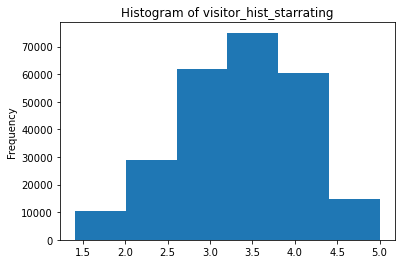

In [50]:
train['visitor_hist_starrating'].plot.hist(bins=6, title="Histogram of visitor_hist_starrating");

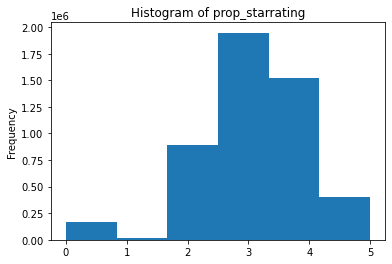

In [51]:
train['prop_starrating'].plot.hist(bins=6, title="Histogram of prop_starrating");

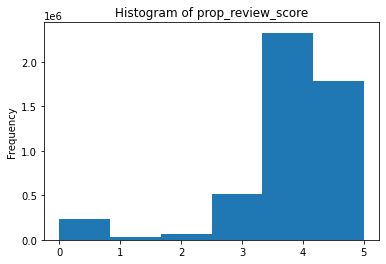

In [52]:
train['prop_review_score'].plot.hist(bins=6, title="Histogram of prop_review_score");

In [53]:
len(train[train["prop_log_historical_price"]<0])

0

In [54]:
len(train[train["price_usd"]<0])

0

In [56]:
len(train[train["srch_length_of_stay"]<0])

0

In [57]:
len(train[train["srch_booking_window"]<0])

0

In [59]:
len(train[train["srch_adults_count"]<0])

0

In [61]:
len(train[train["orig_destination_distance"]<0])

0

In [39]:
train["comp3_rate_percent_diff"].describe() 

count    472797.000000
mean         27.071559
std        1012.919911
min           2.000000
25%           7.000000
50%          11.000000
75%          18.000000
max      199266.000000
Name: comp3_rate_percent_diff, dtype: float64

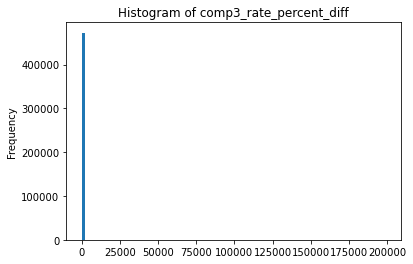

In [42]:
train['comp3_rate_percent_diff'].plot.hist(bins=100, title="Histogram of comp3_rate_percent_diff");

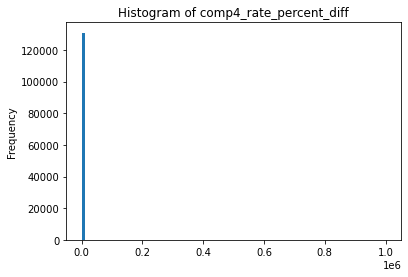

In [62]:
train['comp4_rate_percent_diff'].plot.hist(bins=100, title="Histogram of comp4_rate_percent_diff");